# Histogram, Density of probability, Outliers, Boxplot, Bar chart, Pie chart

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

from warnings import filterwarnings
filterwarnings('ignore')

from scipy import stats

In [2]:
# load the dataset tips from the seaborn library

tips_df  = sns.load_dataset('tips')
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# Histogram

Text(0.5, 1.0, 'Total consumption')

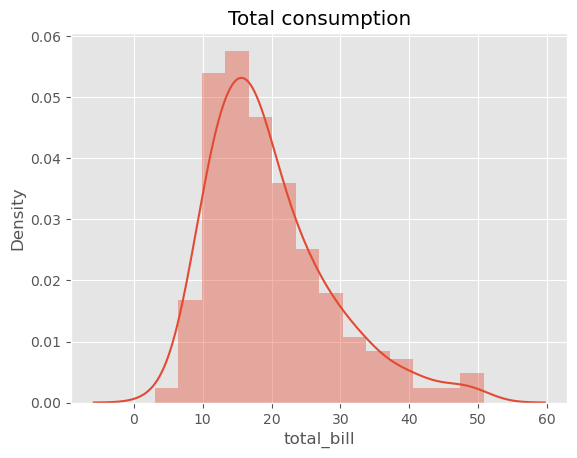

In [3]:
# Histogram of the total amount of the consumption
sns.distplot(tips_df['total_bill']).set_title('Total consumption')

Text(0.5, 1.0, 'Total consumption')

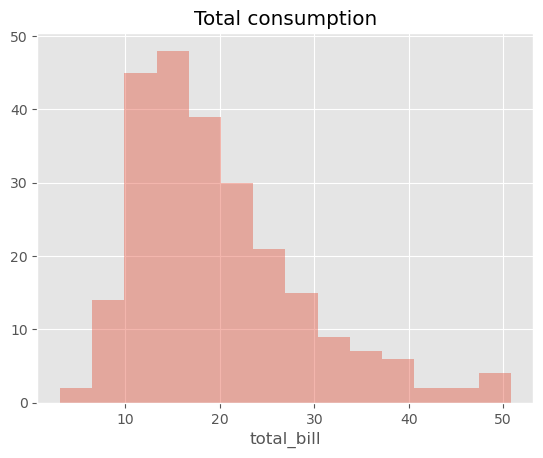

In [4]:
# Histogram of the total amount of the consumption, without the density
sns.distplot(tips_df['total_bill'], kde = False).set_title('Total consumption')

# Density of probability

Text(0.5, 1.0, 'Total consumption')

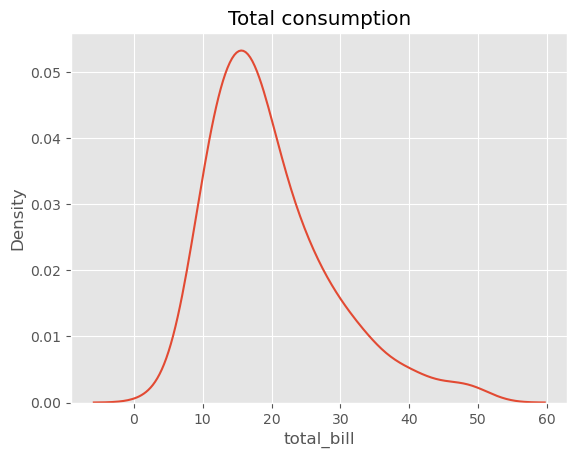

In [5]:
# Density of probability of the total amount of consumption

sns.distplot(tips_df['total_bill'], hist = False).set_title('Total consumption')

Text(0.5, 1.0, 'Normal distribution')

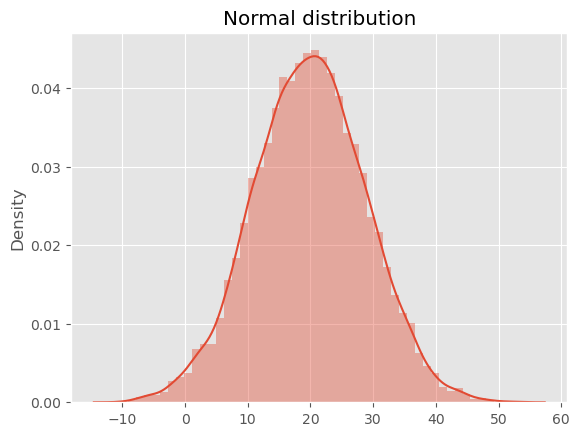

In [6]:
# Exemple of normal distribution, based on the 'total_bill'

mn = tips_df['total_bill'].mean()
st = tips_df['total_bill'].std()
normal_dist = np.random.normal(mn, st, size = 10000)

sns.distplot(normal_dist).set_title('Normal distribution')

Text(0.5, 1.0, 'Distribution normale')

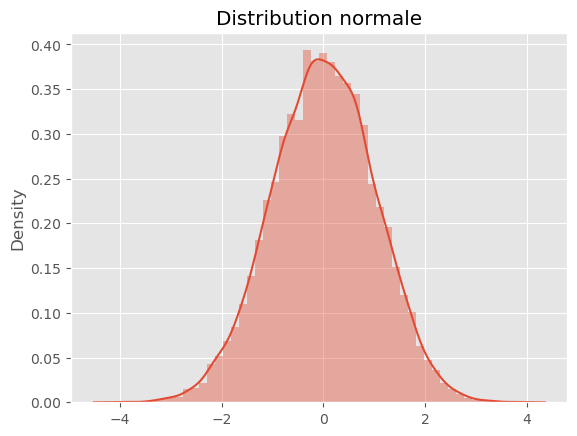

In [7]:
# Exemple of normal distribution

sns.distplot(np.random.normal(size=10000), kde = True).set_title('Distribution normale')

# Outliers

In [8]:
# Function to find the Outliers
# Outliers are: values < Q1 - (1.5 x IQR) or values > Q3 + (1.5 x IQR)

def find_outliers(data, variable):
    # difference inter quartile (iqr)
    iqr = stats.iqr(data[variable])
    
    # 1st and 3rd quartiles
    q1 = np.quantile(data[variable], 0.25)
    q3 = np.quantile(data[variable], 0.75)
    
    # limit values
    limit_lower = q1 - (1.5 * iqr)
    limit_upper = q3 + (1.5 * iqr)
    
    # outliers
    outliers_df = data[(data[variable] < limit_lower) | (data[variable] > limit_upper)]
        
    return(outliers_df)

In [9]:
# Find outliers with the variable 'tip'
find_outliers(tips_df, 'tip')

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
183,23.17,6.50,Male,Yes,Sun,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3


# Boxplot

Text(0.5, 1.0, 'Amount of tips')

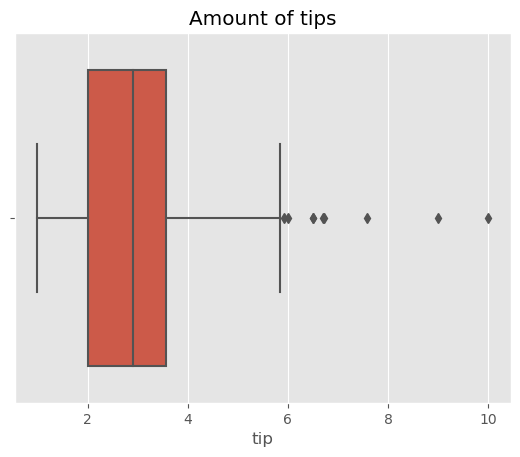

In [10]:
# Boxplot of the amount of tips

sns.boxplot(x = tips_df['tip']).set_title('Amount of tips')

Text(0.5, 1.0, 'Total amount of consumption')

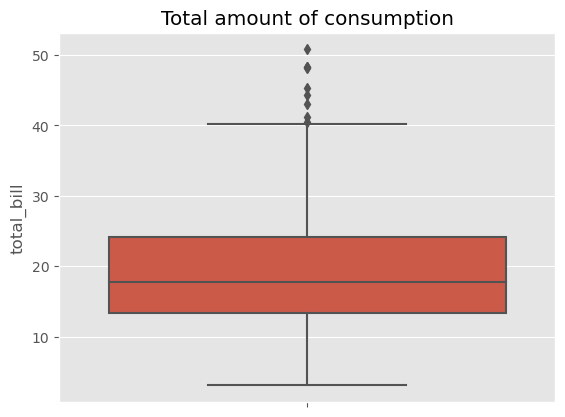

In [11]:
# Boxplot of the total amount of consumption

sns.boxplot(y = tips_df['total_bill']).set_title('Total amount of consumption')

# Bar Chart

Text(0.5, 1.0, 'Affluence per day')

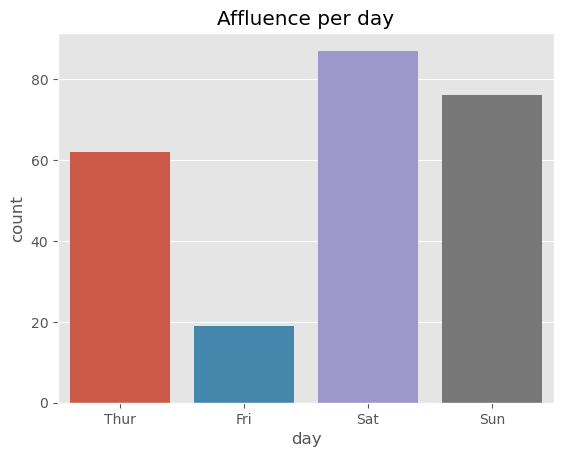

In [12]:
# Bar chart of the variable 'day'
sns.countplot(x = tips_df["day"]).set_title('Affluence per day')

Text(0.5, 1.0, 'Affluence per day')

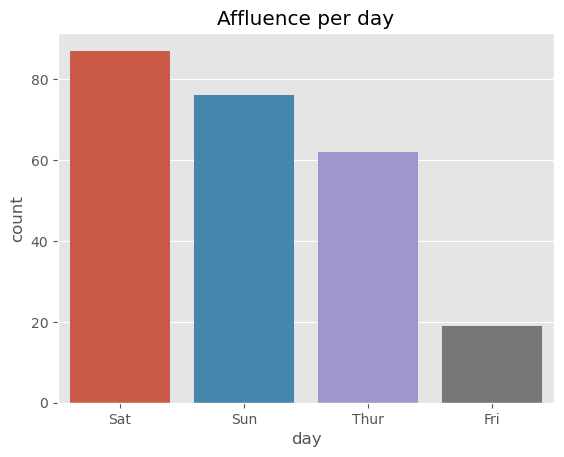

In [13]:
# Bar chart of the variable 'day' ordered
sns.countplot(x = tips_df["day"], order = tips_df["day"].value_counts().index).set_title('Affluence per day')

# Pie Chart

<Axes: title={'center': 'Time'}, ylabel='time'>

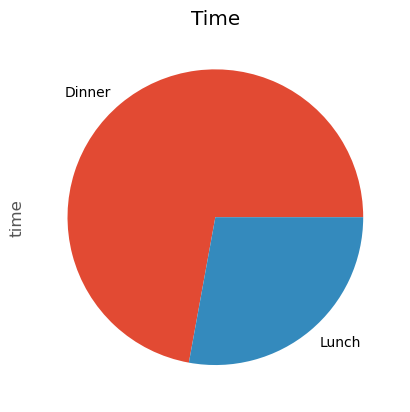

In [14]:
# Pie chart of the variable 'time'
tips_df['time'].value_counts().plot(kind = 'pie', title = 'Time')